In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
date_columns = ['Internship_deadline', 'Earliest_Start_Date', 'Start Date', 
                'End Date', 'Start_Date']

train_merged = pd.read_csv('../data/train_merged.csv', parse_dates=date_columns)
test_merged = pd.read_csv('../data/test_merged.csv', parse_dates=date_columns)

In [4]:
data_dictionary = pd.read_excel('../data/Data_Dictionary.xlsx'); data_dictionary.head()

,Variable_Name,Definition
0,Internship_ID,Internship_ID; Each internship has a unique id...
1,Student_ID,Student_ID - unique for each student
2,Earliest_Start_Date,Earliest date student can start their Internship
3,Expected_Stipend,Expected stipend by student
4,Minimum_Duration,Months students is available for Internship


## Training dataset

In [5]:
train_merged.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Is_Shortlisted,Internship_Profile,Skills_required,...,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date,num_experience,num_exp_in_job,num_awards,num_previous_internships
0,8161,78663553,2015-01-03,2-5K,3,NaN,0,0,Voice Over Movie,NaN,...,80.4,internship,About C,JBEI,2013-08-01,2013-08-02,1,0,0,1
1,4977,7695797,2014-12-19,5-10K,2,IHFG,1,0,Social Media Marketing & Design,NaN,...,82.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
2,10271,78663092,2015-01-06,5-10K,6,NaN,0,0,Java Development,NaN,...,81.4,academic_project,NaN,JBEI,2014-11-01,2014-02-05,5,0,0,0
3,7393,7708503,2014-12-03,2-5K,1,IHFG,0,0,Fashion Curator,NaN,...,91.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
4,11125,78659782,2015-01-02,10K+,6,NaN,1,0,Business Development,"Communication,Business Development (Sales)",...,50.0,NaN,NaN,IIGB,NaT,NaT,1,0,0,0


## Test set

In [6]:
test_merged.head()

,Internship_ID,Student_ID,Earliest_Start_Date,Expected_Stipend,Minimum_Duration,Preferred_location,Is_Part_Time,Internship_Profile,Skills_required,Internship_Type,...,Performance_10th,Experience_Type,Profile,Location,Start Date,End Date,num_experience,num_exp_in_job,num_awards,num_previous_internships
0,9341,7677714,2015-01-25,2-5K,2,IIBD,0,Content Writer,NaN,regular,...,88,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
1,6426,7696418,2015-01-21,5-10K,5,NaN,0,Android Development,NaN,regular,...,60,internship,NETWORK PLANNING,IIDB,2013-06-20,2013-08-19,2,0,0,1
2,5812,78666725,2015-01-09,10K+,5,NaN,1,Recruitment,NaN,regular,...,57,NaN,NaN,IIGB,NaT,NaT,1,0,0,0
3,10711,7705454,2015-01-11,No Expectations,2,NaN,1,Content Development,NaN,virtual,...,74,training,NaN,JBFA,2013-06-05,2013-05-20,1,0,0,0
4,5880,7711946,2015-01-15,No Expectations,2,IHFG,1,Web Development,web development,regular,...,10,academic_project,Stock Analyst,JEJJ,2014-06-03,2015-12-01,6,0,2,1


## Class Distribution

In [7]:
train_merged.Is_Shortlisted.value_counts()

0    168003
1     24579
Name: Is_Shortlisted, dtype: int64

## Exploratory Data Analysis

In [9]:
train_merged.loc[:, 'Earliest_Start_Date_year'] = train_merged.Earliest_Start_Date.dt.year
train_merged.loc[:, 'Earliest_Start_Date_month'] = train_merged.Earliest_Start_Date.dt.month
train_merged.loc[:, 'Earliest_Start_Date_day'] = train_merged.Earliest_Start_Date.dt.day

test_merged.loc[:, 'Earliest_Start_Date_year'] = test_merged.Earliest_Start_Date.dt.year
test_merged.loc[:, 'Earliest_Start_Date_month'] = test_merged.Earliest_Start_Date.dt.month
test_merged.loc[:, 'Earliest_Start_Date_day'] = test_merged.Earliest_Start_Date.dt.day

train_merged.loc[:, 'Internship_deadline_year'] = train_merged.Internship_deadline.dt.year
train_merged.loc[:, 'Internship_deadline_month'] = train_merged.Internship_deadline.dt.month
train_merged.loc[:, 'Internship_deadline_day'] = train_merged.Internship_deadline.dt.day

test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.year
test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.month
test_merged.loc[:, 'Internship_deadline_year'] = test_merged.Internship_deadline.dt.day

In [15]:
train_merged.loc[:, 'date_diff'] = ((train_merged.Internship_deadline - train_merged.Earliest_Start_Date) / np.timedelta64(1, 'D')).astype(int)

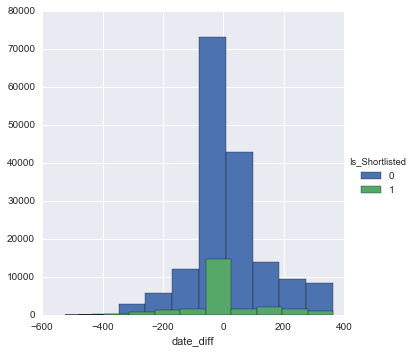

In [16]:
# Relationship between difference between internship deadline vs whether you are shorlisted or not

sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.hist, "date_diff") \
   .add_legend()

In [24]:
## Relationship between expected stipend and Is_Shortlisted

train_merged.loc[:, ['Stipend_Type', 'Is_Shortlisted']].head()

,Stipend_Type,Is_Shortlisted
0,variable,0
1,variable,0
2,fixed,0
3,fixed,0
4,fixed,0


In [31]:
train_merged.Expected_Stipend.value_counts()

5-10K              58552
No Expectations    53628
2-5K               42005
10K+               38397
Name: Expected_Stipend, dtype: int64

In [32]:
def salary_mapping(salary):
    if salary < 2000:
        return 'No Expectations'
    elif salary >= 2000 and salary < 5000:
        return '2-5K'
    elif salary >= 5000 and salary < 10000:
        return '5-10K'
    else:
        return '10K+'

In [36]:
train_merged.Stipend1 = train_merged.Stipend1.fillna(train_merged.Stipend1.mean())

In [42]:
train_merged.loc[:, 'Stipend_level'] = train_merged.Stipend1.map(salary_mapping)

In [45]:
def check_if_expectations_match(row):
    expected_stipend = row['Expected_Stipend']
    stipend_level = row['Stipend_level']
    
    if expected_stipend == 'No Expectations':
        return 1
    elif expected_stipend == '2-5K':
        if stipend_level in ['2-5K', '5-10K', '10K+']:
            return 1
        else:
            return 0
    elif expected_stipend == '5-10K':
        if stipend_level in ['5-10K', '10K+']:
            return 1
        else:
            return 0
    elif stipend_level == '10K+':
        if stipend_level == '10K+':
            return 1
        else:
            return 0

train_merged.loc[:, 'expectations_match'] = train_merged[['Expected_Stipend', 'Stipend_level']].apply(check_if_expectations_match, axis=1)

In [46]:
train_merged.groupby(['expectations_match', 'Is_Shortlisted']).size()

expectations_match  Is_Shortlisted
0                   0                  18906
                    1                   3533
1                   0                 136965
                    1                  19122
dtype: int64

** This is a potential feature **

In [60]:
train_merged.loc[:, 'normalized_stipend_1'] = np.log10(train_merged.Stipend1 + 1)

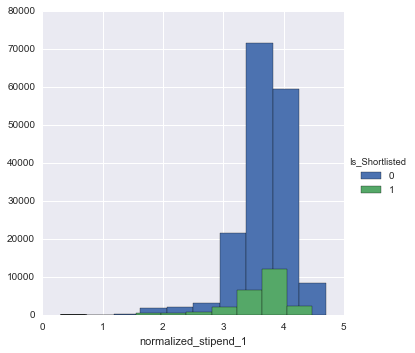

In [61]:
sns.FacetGrid(train_merged, hue="Is_Shortlisted", size=5) \
   .map(plt.hist, "normalized_stipend_1") \
   .add_legend()

In [56]:
def check_if_locations_match(row):
    internship_location = row['Internship_Location']
    student_location = row['Location']
    
    return int(internship_location == student_location)

In [57]:
train_merged.loc[:, 'location_match'] = train_merged[['Internship_Location', 'Location']].apply(check_if_locations_match, axis=1)

In [59]:
train_merged.groupby(['location_match', 'Is_Shortlisted']).size()

location_match  Is_Shortlisted
0               0                 135976
                1                  17859
1               0                  32027
                1                   6720
dtype: int64

In [48]:
train_merged.loc[:, ['Internship_Location', 'Is_Shortlisted']].head()

,Internship_Location,Is_Shortlisted
0,IIGB,0
1,IIDB,0
2,IIDB,0
3,JABD,0
4,IIDB,0


In [52]:
print 'Number of levels of Internship location ', len(train_merged.Internship_Location.unique())

Number of levels of Internship location  60


In [55]:
len(train_merged.Location.unique())

523

In [51]:
train_merged.Internship_Location.value_counts()

IIDB    37374
IIBD    32493
IIGB    31357
JABD    26976
JEJJ    22242
IJBG    10230
IHJB     9073
IJCE     8121
JBDB     2840
IJJI     2526
JECD     2253
JBEI     2015
IJAB     1278
IJBH      627
JEEH      460
IIFB      321
JBBE      213
JBGD      201
IIJJ      171
IHHH      160
JCDD      159
JBID      124
JAGD      116
JCBC      115
JDII      110
JDCA      106
IJAE      105
IHFG       85
JAJJ       82
IIDC       75
IHGB       73
IIHJ       51
JBBG       49
JCJG       39
IIAI       37
IJDJ       25
IIIG       23
JDGH       23
JADH       23
JEDC       21
JCGF       21
JCCD       19
IIGA       19
JAHE       19
JDAE       18
IHJC       14
JADF       13
IIJI       13
JEBC       12
JACD       12
JDEC       10
JDIB        6
JDHI        6
JDEF        5
IJFJ        5
JEAE        5
JCJE        4
JDFF        4
IJIG        3
JEHE        2
Name: Internship_Location, dtype: int64

In [50]:
train_merged.groupby(['Internship_Location', 'Is_Shortlisted']).size()

Internship_Location  Is_Shortlisted
IHFG                 0                    32
                     1                    53
IHGB                 0                    51
                     1                    22
IHHH                 0                   142
                     1                    18
IHJB                 0                  8278
                     1                   795
IHJC                 0                     7
                     1                     7
IIAI                 0                    36
                     1                     1
IIBD                 0                 29015
                     1                  3478
IIDB                 0                 33106
                     1                  4268
IIDC                 0                    61
                     1                    14
IIFB                 0                   314
                     1                     7
IIGA                 0                    19
IIGB               